In [17]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from joblib import dump, load
from sklearn.tree import plot_tree

In [18]:
df = pd.read_csv('../global_preprocessed_without_onehot_and_norm.csv', encoding='ISO-8859-1')
row_count = df.shape[0]
column_count = df.shape[1]
df

,iyear,extended,region,nkill,nwound,attacktype1,nperps,suicide,success
0,1970,0,2,1.0,0.0,1,0.0,0,1
1,1970,0,1,0.0,0.0,6,7.0,0,1
2,1970,0,5,1.0,0.0,1,0.0,0,1
3,1970,0,8,0.0,0.0,3,0.0,0,1
4,1970,0,4,0.0,0.0,7,0.0,0,1
...,...,...,...,...,...,...,...,...,...
171275,2017,0,11,1.0,2.0,2,1.0,0,1
171276,2017,0,10,2.0,7.0,3,1.0,0,1
171277,2017,0,5,0.0,0.0,7,1.0,0,1
171278,2017,0,6,0.0,0.0,3,1.0,0,0


In [19]:
model = load("tree_model.joblib")

In [20]:
x = df.drop("extended", axis=1)
y = df['extended']
# x = df.drop("region", axis=1)
# y = df["region"]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

/home/gleb/miniconda3/envs/rapids-23.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Text(58.222222222222214, 0.5, 'Truth')

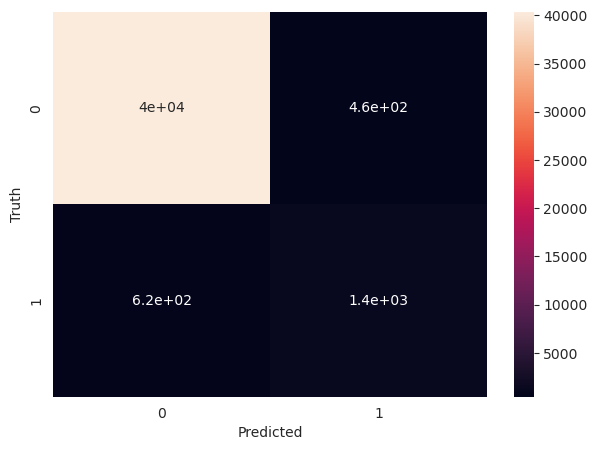

In [21]:
y_pred = model.predict(x_test.values)
matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 5))
sns.heatmap(matrix, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [22]:
df_show = x_test
df_show["Predicted"] = y_pred
df0 = df_show[y_pred==0]
df1 = df_show[y_pred>0]
x_test = x_test.drop("Predicted", axis=1)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     40832
           1       0.75      0.69      0.71      1988

    accuracy                           0.97     42820
   macro avg       0.87      0.84      0.85     42820
weighted avg       0.97      0.97      0.97     42820


        iyear  region  nkill  nwound  attacktype1  nperps  suicide  success
97808    2011      10    0.0     0.0            3     1.0        0        1
122142   2014      10    1.0     2.0            3     1.0        0        1
32313    1988       3    0.0     0.0            2     0.0        0        1
90676    2010       6    0.0     1.0            3     1.0        0        1
169951   2017      10    0.0     4.0            3     1.0        0        1
...       ...     ...    ...     ...          ...     ...      ...      ...
97639    2011       6    0.0     0.0            3     1.0        0        1
95939    2011      10    1.0     0.0            2     1.0        0        1
152315   2016       6    1.0     0.0            2     2.0        0        1
117952   2013      10    6.0     0.0            3     1.0        0        1
43567    1991       3    1.0     1.0            2     0.0        0        1

[128460 rows x 8 columns]


[Text(0.5181592561521253, 0.9545454545454546, 'attacktype1 <= 3.5\nentropy = 0.271\nsamples = 128460\nvalue = [122509, 5951]'),
 Text(0.2928376677852349, 0.8636363636363636, 'attacktype1 <= 2.5\nentropy = 0.044\nsamples = 105870\nvalue = [105356, 514]'),
 Text(0.15394295302013422, 0.7727272727272727, 'iyear <= 1997.5\nentropy = 0.082\nsamples = 42517\nvalue = [42086, 431]'),
 Text(0.05942393736017897, 0.6818181818181818, 'nperps <= 7.5\nentropy = 0.022\nsamples = 18595\nvalue = [18556, 39]'),
 Text(0.027125279642058166, 0.5909090909090909, 'attacktype1 <= 1.5\nentropy = 0.016\nsamples = 17720\nvalue = [17693, 27]'),
 Text(0.008948545861297539, 0.5, 'nkill <= 15.5\nentropy = 0.008\nsamples = 8856\nvalue = [8850, 6]'),
 Text(0.006711409395973154, 0.4090909090909091, 'region <= 8.5\nentropy = 0.007\nsamples = 8847\nvalue = [8842, 5]'),
 Text(0.0044742729306487695, 0.3181818181818182, 'iyear <= 1980.5\nentropy = 0.009\nsamples = 6727\nvalue = [6722, 5]'),
 Text(0.0022371364653243847, 0.227

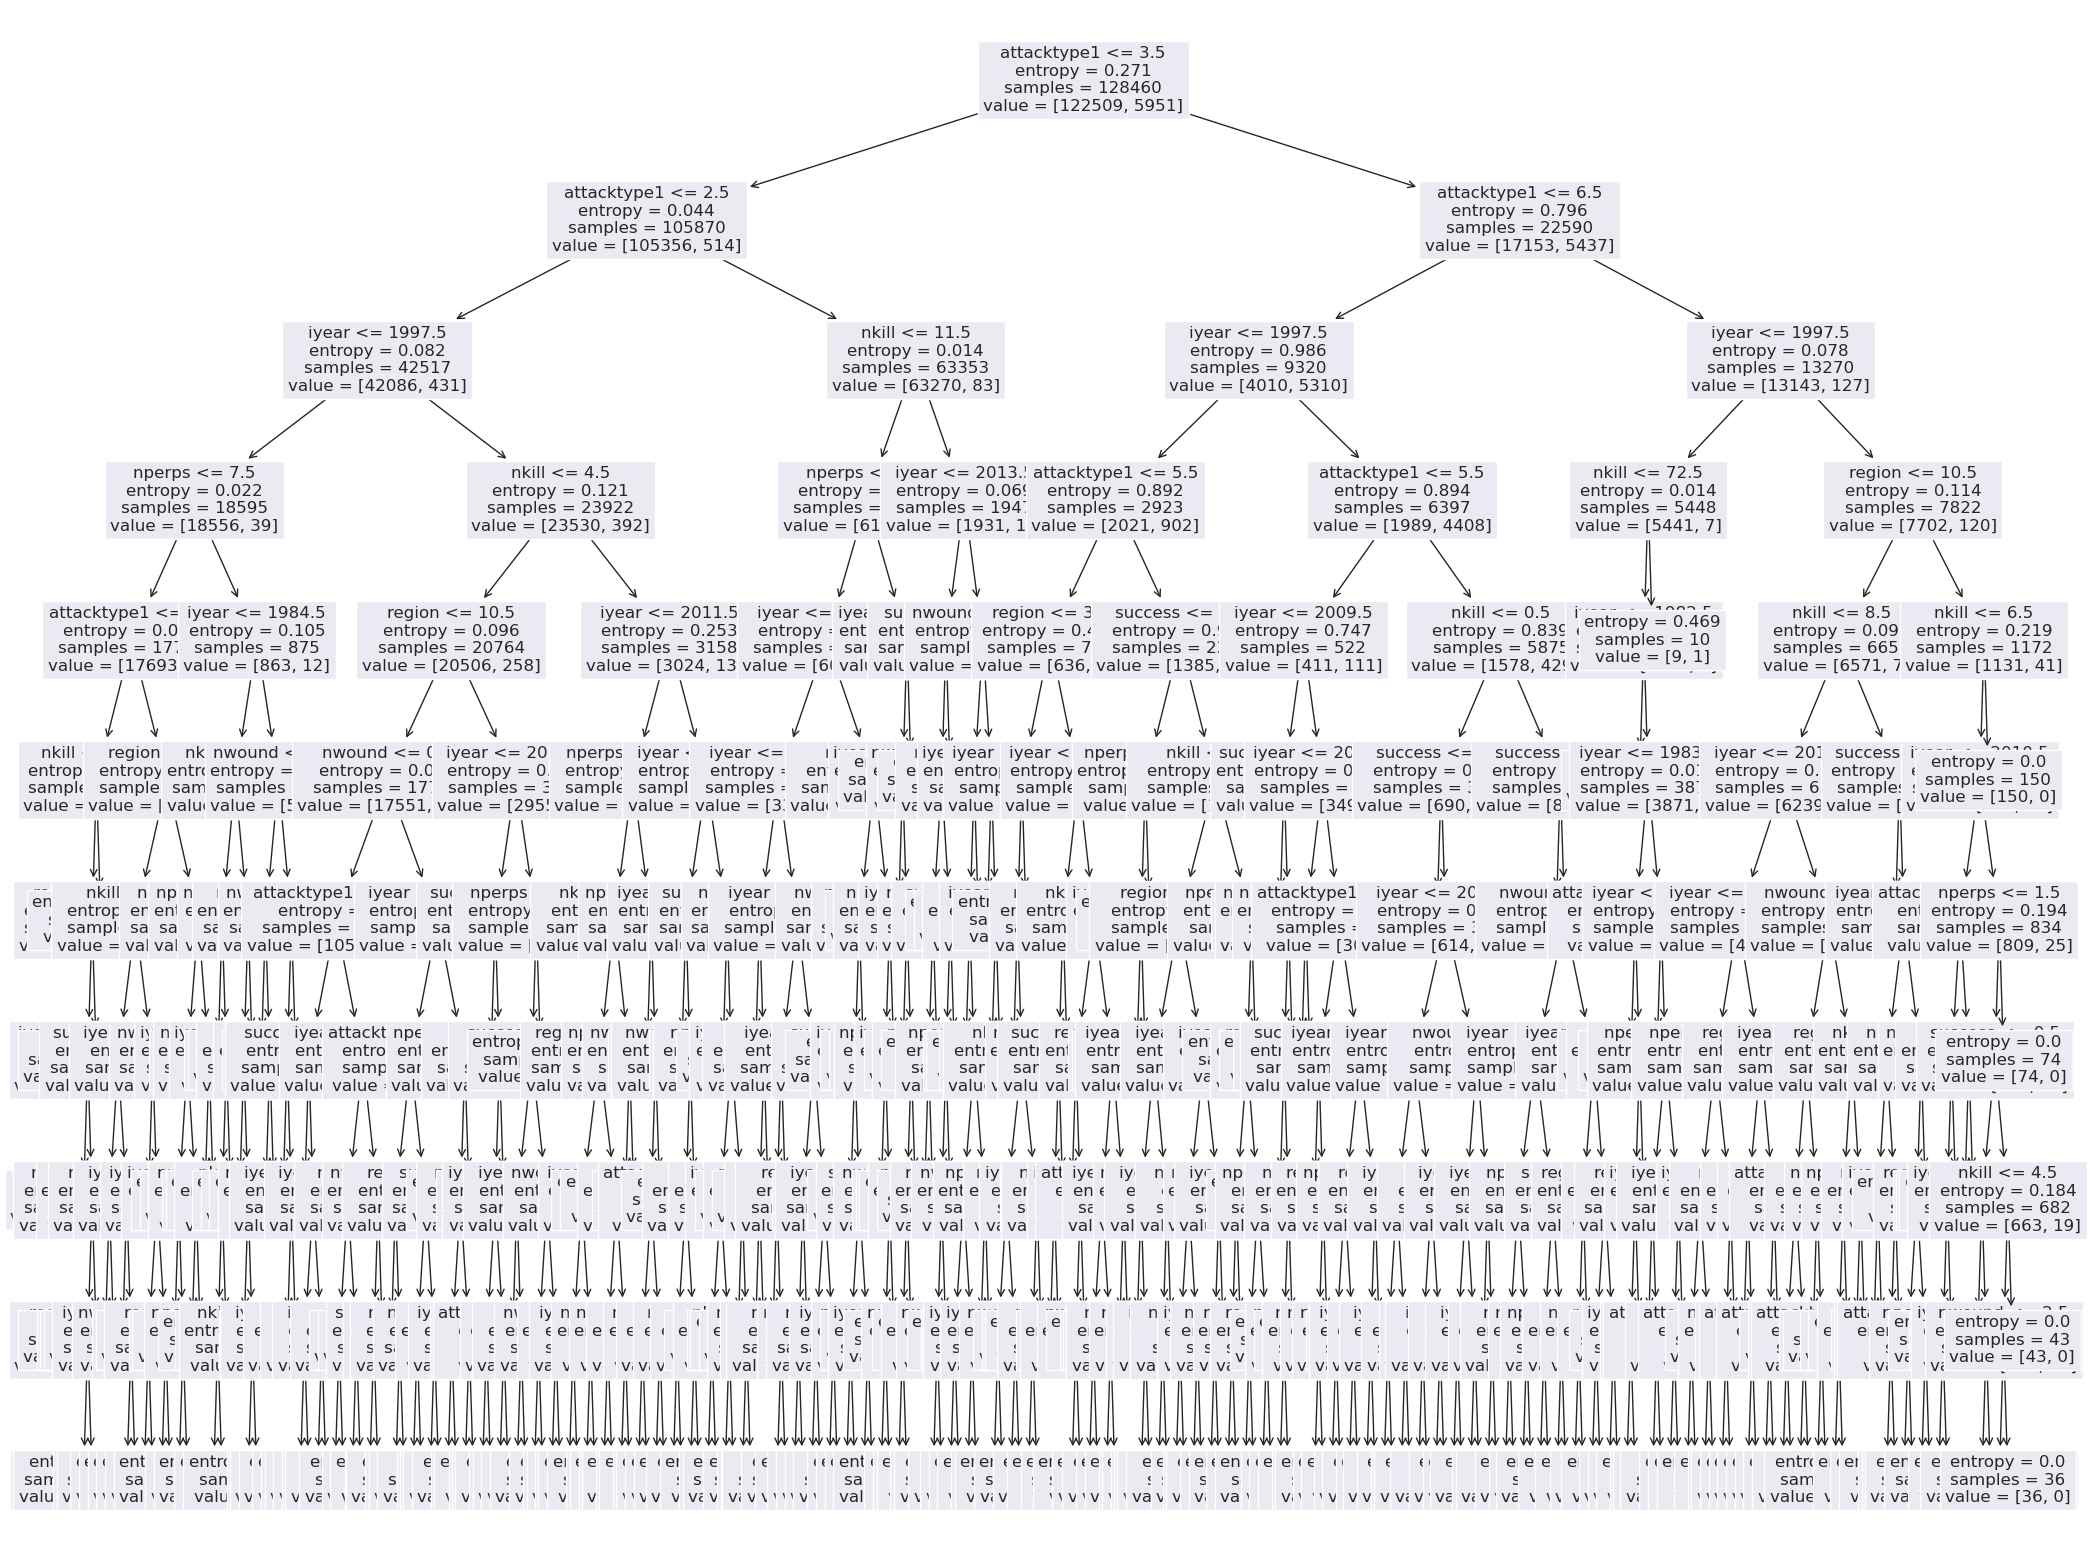

In [24]:
plt.figure(figsize=(25,20))
print(x_train)
plot_tree(model.best_estimator_, fontsize=12, feature_names=list(x_test.columns))